In [1]:
#滤除停用字、姓名、数字 nltk

In [2]:
import nltk
sw = set(nltk.corpus.stopwords.words('english')) #set() 函数创建一个无序不重复元素集，可进行关系测试，删除重复数据，还可以计算交集、差集、并集等。
print('Stop words')
list(sw)[:7]                #注意set()打印方法

Stop words


['those', 'did', 'until', 'your', 'what', 'himself', 's']

In [3]:
#加载Gutenberg语料库，输出部分文件的名称
gb = nltk.corpus.gutenberg
print('Gutenberg files'),
gb.fileids()[-5:]

Gutenberg files


['milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [4]:
#从Gbtenberg语料库中中获取内容：raw; words; sents
text_raw = gb.raw('milton-paradise.txt')[:500]
print('Unfiltered_raws: ' + str(text_raw))

text_word = gb.words('milton-paradise.txt')[:20]   
print('Unfiltered_words:  ' + str(text_word))

text_sent = gb.sents('milton-paradise.txt')[:5]   
print('Unfiltered_sents:  ' + str(text_sent))

Unfiltered_raws: [Paradise Lost by John Milton 1667] 
 
 
Book I 
 
 
Of Man's first disobedience, and the fruit 
Of that forbidden tree whose mortal taste 
Brought death into the World, and all our woe, 
With loss of Eden, till one greater Man 
Restore us, and regain the blissful seat, 
Sing, Heavenly Muse, that, on the secret top 
Of Oreb, or of Sinai, didst inspire 
That shepherd who first taught the chosen seed 
In the beginning how the heavens and earth 
Rose out of Chaos: or, if Sion hill 
Delight thee mor
Unfiltered_words:  ['[', 'Paradise', 'Lost', 'by', 'John', 'Milton', '1667', ']', 'Book', 'I', 'Of', 'Man', "'", 's', 'first', 'disobedience', ',', 'and', 'the', 'fruit']
Unfiltered_sents:  [['[', 'Paradise', 'Lost', 'by', 'John', 'Milton', '1667', ']'], ['Book', 'I'], ['Of', 'Man', "'", 's', 'first', 'disobedience', ',', 'and', 'the', 'fruit', 'Of', 'that', 'forbidden', 'tree', 'whose', 'mortal', 'taste', 'Brought', 'death', 'into', 'the', 'World', ',', 'and', 'all', 'our', 'w

In [5]:
#过滤stopwords
for sent in text_sent:
    filtered = [w for w in sent if w.lower() not in sw]
    print('Filetered: '+str(filtered))

Filetered: ['[', 'Paradise', 'Lost', 'John', 'Milton', '1667', ']']
Filetered: ['Book']
Filetered: ['Man', "'", 'first', 'disobedience', ',', 'fruit', 'forbidden', 'tree', 'whose', 'mortal', 'taste', 'Brought', 'death', 'World', ',', 'woe', ',', 'loss', 'Eden', ',', 'till', 'one', 'greater', 'Man', 'Restore', 'us', ',', 'regain', 'blissful', 'seat', ',', 'Sing', ',', 'Heavenly', 'Muse', ',', ',', 'secret', 'top', 'Oreb', ',', 'Sinai', ',', 'didst', 'inspire', 'shepherd', 'first', 'taught', 'chosen', 'seed', 'beginning', 'heavens', 'earth', 'Rose', 'Chaos', ':', ',', 'Sion', 'hill', 'Delight', 'thee', ',', 'Siloa', "'", 'brook', 'flowed', 'Fast', 'oracle', 'God', ',', 'thence', 'Invoke', 'thy', 'aid', 'adventurous', 'song', ',', 'middle', 'flight', 'intends', 'soar', 'th', "'", 'Aonian', 'mount', ',', 'pursues', 'Things', 'unattempted', 'yet', 'prose', 'rhyme', '.']
Filetered: ['chiefly', 'thou', ',', 'Spirit', ',', 'dost', 'prefer', 'temples', 'th', "'", 'upright', 'heart', 'pure', ','

In [6]:
#获取词性标签：单数专有名词NNP，如姓名 ；数字对应基数标签CD； 注：如果单词首字母大写，就将其标为NNP
tagged = nltk.pos_tag(filtered)
print('Tagged' + str(tagged))

Tagged[('Say', 'NNP'), ('first', 'RB'), ('--', ':'), ('Heaven', 'NNP'), ('hides', 'VBZ'), ('nothing', 'NN'), ('thy', 'JJ'), ('view', 'NN'), (',', ','), ('deep', 'JJ'), ('tract', 'NN'), ('Hell', 'NNP'), ('--', ':'), ('say', 'VBP'), ('first', 'JJ'), ('cause', 'NN'), ('Moved', 'NNP'), ('grand', 'JJ'), ('parents', 'NNS'), (',', ','), ('happy', 'JJ'), ('state', 'NN'), (',', ','), ('Favoured', 'NNP'), ('Heaven', 'NNP'), ('highly', 'RB'), (',', ','), ('fall', 'NN'), ('Creator', 'NNP'), (',', ','), ('transgress', 'NN'), ('one', 'CD'), ('restraint', 'NN'), (',', ','), ('lords', 'NNS'), ('World', 'NNP'), ('besides', 'IN'), ('.', '.')]


In [7]:
#滤除姓名，数字
words = []
for word in tagged:
    if word[1] != 'NNP' and word[1] != 'CD':
        words.append(word[0])
        
words

['first',
 '--',
 'hides',
 'nothing',
 'thy',
 'view',
 ',',
 'deep',
 'tract',
 '--',
 'say',
 'first',
 'cause',
 'grand',
 'parents',
 ',',
 'happy',
 'state',
 ',',
 'highly',
 ',',
 'fall',
 ',',
 'transgress',
 'restraint',
 ',',
 'lords',
 'besides',
 '.']

In [8]:
text_sent = gb.sents('milton-paradise.txt')[:3]   
print('Unfiltered_sents:  ' + str(text_sent) + '\n')
for sent in text_sent:
    filtered = [w for w in sent if w.lower() not in sw]
    print('-Filetered: ' + str(filtered))
    
    tagged = nltk.pos_tag(filtered)
    print('-Tagged' + str(tagged))
    
    words = []
    for word in tagged:
        if word[1] != 'NNP' and word[1] != 'CD':
            words.append(word[0])
    
    print('-end: ' + str(words) + '\n')

Unfiltered_sents:  [['[', 'Paradise', 'Lost', 'by', 'John', 'Milton', '1667', ']'], ['Book', 'I'], ['Of', 'Man', "'", 's', 'first', 'disobedience', ',', 'and', 'the', 'fruit', 'Of', 'that', 'forbidden', 'tree', 'whose', 'mortal', 'taste', 'Brought', 'death', 'into', 'the', 'World', ',', 'and', 'all', 'our', 'woe', ',', 'With', 'loss', 'of', 'Eden', ',', 'till', 'one', 'greater', 'Man', 'Restore', 'us', ',', 'and', 'regain', 'the', 'blissful', 'seat', ',', 'Sing', ',', 'Heavenly', 'Muse', ',', 'that', ',', 'on', 'the', 'secret', 'top', 'Of', 'Oreb', ',', 'or', 'of', 'Sinai', ',', 'didst', 'inspire', 'That', 'shepherd', 'who', 'first', 'taught', 'the', 'chosen', 'seed', 'In', 'the', 'beginning', 'how', 'the', 'heavens', 'and', 'earth', 'Rose', 'out', 'of', 'Chaos', ':', 'or', ',', 'if', 'Sion', 'hill', 'Delight', 'thee', 'more', ',', 'and', 'Siloa', "'", 's', 'brook', 'that', 'flowed', 'Fast', 'by', 'the', 'oracle', 'of', 'God', ',', 'I', 'thence', 'Invoke', 'thy', 'aid', 'to', 'my', 'ad

In [9]:
#2、词袋模型(没有先后顺序及关系的词，构成的集合); scikit-learn (机器学习库)

In [10]:
#特征（每个unique word视为语料库的一个特征） 特征向量化→ 特征向量(可以为每个文档建立一个特征向量)

In [11]:
from sklearn.feature_extraction.text import CountVectorizer #词频 向量生成器
hamlet = gb.raw('shakespeare-hamlet.txt')
macbeth = gb.raw('shakespeare-macbeth.txt')

In [12]:
#去掉英语停用词并创建特征向量
cv = CountVectorizer(stop_words='english')  #CountVectorizer类可以通过设置stop_words参数过滤停用词
print('Feature vector: '),
cv.fit_transform([hamlet,macbeth]).toarray() #fit_transform()先拟合数据，然后转化它将其转化为标准形式  .toarray()集合转数组

Feature vector: 


array([[ 1,  0,  1, ..., 14,  0,  1],
       [ 0,  1,  0, ...,  1,  1,  0]], dtype=int64)

In [13]:
#输出特征值
print('Features: ')
cv.get_feature_names()[:5]

Features: 


['1599', '1603', 'abhominably', 'abhorred', 'abide']

In [14]:
#3、词频分析

In [15]:
import string

In [16]:
words = gb.words('shakespeare-caesar.txt')
words

['[', 'The', 'Tragedie', 'of', 'Julius', 'Caesar', ...]

In [17]:
punctuation = set(string.punctuation)
punctuation

{'!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~'}

In [18]:
#剔除停用词和标点
filtered = [w.lower() for w in words if w.lower() not in sw and
           w.lower() not in punctuation]
filtered

['tragedie',
 'julius',
 'caesar',
 'william',
 'shakespeare',
 '1599',
 'actus',
 'primus',
 'scoena',
 'prima',
 'enter',
 'flauius',
 'murellus',
 'certaine',
 'commoners',
 'ouer',
 'stage',
 'flauius',
 'hence',
 'home',
 'idle',
 'creatures',
 'get',
 'home',
 'holiday',
 'know',
 'mechanicall',
 'ought',
 'walke',
 'vpon',
 'labouring',
 'day',
 'without',
 'signe',
 'profession',
 'speake',
 'trade',
 'art',
 'thou',
 'car',
 'sir',
 'carpenter',
 'mur',
 'thy',
 'leather',
 'apron',
 'thy',
 'rule',
 'dost',
 'thou',
 'thy',
 'best',
 'apparrell',
 'sir',
 'trade',
 'cobl',
 'truely',
 'sir',
 'respect',
 'fine',
 'workman',
 'would',
 'say',
 'cobler',
 'mur',
 'trade',
 'art',
 'thou',
 'answer',
 'directly',
 'cob',
 'trade',
 'sir',
 'hope',
 'may',
 'vse',
 'safe',
 'conscience',
 'indeed',
 'sir',
 'mender',
 'bad',
 'soules',
 'fla',
 'trade',
 'thou',
 'knaue',
 'thou',
 'naughty',
 'knaue',
 'trade',
 'cobl',
 'nay',
 'beseech',
 'sir',
 'yet',
 'sir',
 'mend',
 'mur'

In [19]:
#创建FreqDist对象(将单词封装成字典)

#单个单词  双词：biframs();  三词:triframs()
fd = nltk.FreqDist(filtered)
for k,v in fd.items():
    print("\nkey:" + str(k))
    print('value:'+str(v))


key:tragedie
value:2

key:julius
value:1

key:caesar
value:190

key:william
value:1

key:shakespeare
value:1

key:1599
value:1

key:actus
value:5

key:primus
value:1

key:scoena
value:1

key:prima
value:1

key:enter
value:64

key:flauius
value:5

key:murellus
value:2

key:certaine
value:6

key:commoners
value:2

key:ouer
value:9

key:stage
value:1

key:hence
value:12

key:home
value:12

key:idle
value:3

key:creatures
value:2

key:get
value:11

key:holiday
value:1

key:know
value:70

key:mechanicall
value:1

key:ought
value:4

key:walke
value:7

key:vpon
value:48

key:labouring
value:1

key:day
value:46

key:without
value:5

key:signe
value:4

key:profession
value:1

key:speake
value:35

key:trade
value:6

key:art
value:25

key:thou
value:115

key:car
value:1

key:sir
value:23

key:carpenter
value:1

key:mur
value:5

key:thy
value:56

key:leather
value:2

key:apron
value:1

key:rule
value:2

key:dost
value:4

key:best
value:12

key:apparrell
value:1

key:cobl
value:2

key:truely
value

value:4

key:sword
value:13

key:met
value:3

key:lyon
value:3

key:glaz
value:1

key:surly
value:1

key:annoying
value:1

key:drawne
value:1

key:heape
value:1

key:hundred
value:3

key:gastly
value:1

key:women
value:3

key:transformed
value:1

key:swore
value:2

key:streetes
value:3

key:yesterday
value:2

key:bird
value:1

key:sit
value:4

key:noone
value:1

key:howting
value:1

key:shreeking
value:1

key:prodigies
value:2

key:conioyntly
value:1

key:reasons
value:8

key:naturall
value:1

key:portentous
value:1

key:clymate
value:1

key:disposed
value:1

key:cleane
value:1

key:purpose
value:4

key:disturbed
value:1

key:skie
value:1

key:romane
value:3

key:voyce
value:6

key:pleasing
value:1

key:heauens
value:5

key:menace
value:1

key:knowne
value:4

key:full
value:10

key:faults
value:4

key:walk
value:3

key:submitting
value:1

key:perillous
value:1

key:vnbraced
value:2

key:bar
value:1

key:bosome
value:3

key:stone
value:1

key:crosse
value:3

key:blew
value:1

key:seem
v

value:7

key:knee
value:2

key:preuaile
value:1

key:deci
value:6

key:haile
value:3

key:happy
value:3

key:greeting
value:1

key:false
value:2

key:falser
value:1

key:stretcht
value:2

key:afear
value:1

key:gray
value:1

key:beards
value:1

key:lest
value:1

key:laught
value:1

key:satisfie
value:1

key:priuate
value:3

key:satisfaction
value:1

key:stayes
value:1

key:dreampt
value:1

key:fountaine
value:1

key:spouts
value:1

key:pure
value:1

key:smiling
value:2

key:bathe
value:2

key:apply
value:1

key:warnings
value:1

key:portents
value:1

key:euils
value:2

key:imminent
value:1

key:begg
value:1

key:interpreted
value:1

key:vision
value:1

key:fortunate
value:2

key:spouting
value:1

key:pipes
value:1

key:bath
value:1

key:signifies
value:1

key:reuiuing
value:1

key:tinctures
value:1

key:staines
value:1

key:reliques
value:1

key:cognisance
value:1

key:signified
value:1

key:expounded
value:1

key:concluded
value:1

key:mocke
value:1

key:apt
value:3

key:loe
value:2



key:noted
value:1

key:pella
value:1

key:taking
value:1

key:bribes
value:2

key:sardians
value:1

key:praying
value:1

key:slighted
value:1

key:case
value:1

key:nice
value:1

key:comment
value:1

key:itching
value:2

key:sell
value:2

key:mart
value:1

key:offices
value:1

key:vndeseruers
value:1

key:corruption
value:1

key:chasticement
value:2

key:reme
value:1

key:ber
value:1

key:bleede
value:1

key:iustice
value:2

key:villaine
value:1

key:formost
value:1

key:supporting
value:1

key:robbers
value:1

key:contaminate
value:1

key:space
value:1

key:large
value:1

key:grasped
value:1

key:dogge
value:1

key:moone
value:1

key:baite
value:1

key:indure
value:2

key:hedge
value:1

key:older
value:1

key:practice
value:2

key:abler
value:1

key:farther
value:1

key:possible
value:1

key:rash
value:2

key:choller
value:1

key:frighted
value:1

key:madman
value:1

key:stares
value:1

key:proud
value:1

key:break
value:2

key:chollericke
value:1

key:bondmen
value:2

key:bouge
value

In [20]:
print('Max: ' + str(fd.max()))

print('Count: ' + str(fd['caesar']))

Max: caesar
Count: 190


In [21]:
#两个单词
fd = nltk.FreqDist(nltk.trigrams(filtered))
for k,v in fd.items():
    print("\nkey:" + str(k))
    print('value:'+str(v))


key:('tragedie', 'julius', 'caesar')
value:1

key:('julius', 'caesar', 'william')
value:1

key:('caesar', 'william', 'shakespeare')
value:1

key:('william', 'shakespeare', '1599')
value:1

key:('shakespeare', '1599', 'actus')
value:1

key:('1599', 'actus', 'primus')
value:1

key:('actus', 'primus', 'scoena')
value:1

key:('primus', 'scoena', 'prima')
value:1

key:('scoena', 'prima', 'enter')
value:1

key:('prima', 'enter', 'flauius')
value:1

key:('enter', 'flauius', 'murellus')
value:1

key:('flauius', 'murellus', 'certaine')
value:1

key:('murellus', 'certaine', 'commoners')
value:1

key:('certaine', 'commoners', 'ouer')
value:1

key:('commoners', 'ouer', 'stage')
value:1

key:('ouer', 'stage', 'flauius')
value:1

key:('stage', 'flauius', 'hence')
value:1

key:('flauius', 'hence', 'home')
value:1

key:('hence', 'home', 'idle')
value:1

key:('home', 'idle', 'creatures')
value:1

key:('idle', 'creatures', 'get')
value:1

key:('creatures', 'get', 'home')
value:1

key:('get', 'home', 'h


key:('let', 'hinder', 'cassius')
value:1

key:('hinder', 'cassius', 'desires')
value:1

key:('cassius', 'desires', 'ile')
value:1

key:('desires', 'ile', 'leaue')
value:1

key:('ile', 'leaue', 'cassi')
value:1

key:('leaue', 'cassi', 'brutus')
value:1

key:('cassi', 'brutus', 'obserue')
value:1

key:('brutus', 'obserue', 'late')
value:1

key:('obserue', 'late', 'haue')
value:1

key:('late', 'haue', 'eyes')
value:1

key:('haue', 'eyes', 'gentlenesse')
value:1

key:('eyes', 'gentlenesse', 'shew')
value:1

key:('gentlenesse', 'shew', 'loue')
value:1

key:('shew', 'loue', 'wont')
value:1

key:('loue', 'wont', 'haue')
value:1

key:('wont', 'haue', 'beare')
value:1

key:('haue', 'beare', 'stubborne')
value:1

key:('beare', 'stubborne', 'strange')
value:1

key:('stubborne', 'strange', 'hand')
value:1

key:('strange', 'hand', 'ouer')
value:1

key:('hand', 'ouer', 'friend')
value:1

key:('ouer', 'friend', 'loues')
value:1

key:('friend', 'loues', 'bru')
value:1

key:('loues', 'bru', 'cassius')

value:1

key:('thinke', 'life', 'single')
value:1

key:('life', 'single', 'selfe')
value:1

key:('single', 'selfe', 'liefe')
value:1

key:('selfe', 'liefe', 'liue')
value:1

key:('liefe', 'liue', 'awe')
value:1

key:('liue', 'awe', 'thing')
value:1

key:('awe', 'thing', 'selfe')
value:1

key:('thing', 'selfe', 'borne')
value:1

key:('selfe', 'borne', 'free')
value:1

key:('borne', 'free', 'caesar')
value:1

key:('free', 'caesar', 'haue')
value:1

key:('caesar', 'haue', 'fed')
value:1

key:('haue', 'fed', 'well')
value:1

key:('fed', 'well', 'endure')
value:1

key:('well', 'endure', 'winters')
value:1

key:('endure', 'winters', 'cold')
value:1

key:('winters', 'cold', 'well')
value:1

key:('cold', 'well', 'hee')
value:1

key:('well', 'hee', 'vpon')
value:1

key:('hee', 'vpon', 'rawe')
value:1

key:('vpon', 'rawe', 'gustie')
value:1

key:('rawe', 'gustie', 'day')
value:1

key:('gustie', 'day', 'troubled')
value:1

key:('day', 'troubled', 'tyber')
value:1

key:('troubled', 'tyber', 'chafi

value:1

key:('one', 'onely', 'man')
value:1

key:('onely', 'man', 'haue')
value:1

key:('man', 'haue', 'heard')
value:1

key:('haue', 'heard', 'fathers')
value:1

key:('heard', 'fathers', 'say')
value:1

key:('fathers', 'say', 'brutus')
value:1

key:('say', 'brutus', 'would')
value:1

key:('brutus', 'would', 'haue')
value:1

key:('would', 'haue', 'brook')
value:1

key:('haue', 'brook', 'th')
value:1

key:('brook', 'th', 'eternall')
value:1

key:('th', 'eternall', 'diuell')
value:1

key:('eternall', 'diuell', 'keepe')
value:1

key:('diuell', 'keepe', 'state')
value:1

key:('keepe', 'state', 'rome')
value:1

key:('state', 'rome', 'easily')
value:1

key:('rome', 'easily', 'king')
value:1

key:('easily', 'king', 'bru')
value:1

key:('king', 'bru', 'loue')
value:1

key:('bru', 'loue', 'nothing')
value:1

key:('loue', 'nothing', 'iealous')
value:1

key:('nothing', 'iealous', 'would')
value:1

key:('iealous', 'would', 'worke')
value:1

key:('would', 'worke', 'haue')
value:1

key:('worke', 'h

key:('hath', 'chanc', 'day')
value:1

key:('chanc', 'day', 'caesar')
value:1

key:('day', 'caesar', 'lookes')
value:1

key:('caesar', 'lookes', 'sad')
value:1

key:('lookes', 'sad', 'cask')
value:1

key:('sad', 'cask', 'bru')
value:1

key:('cask', 'bru', 'aske')
value:1

key:('bru', 'aske', 'caska')
value:1

key:('aske', 'caska', 'chanc')
value:1

key:('caska', 'chanc', 'cask')
value:1

key:('chanc', 'cask', 'crowne')
value:1

key:('cask', 'crowne', 'offer')
value:1

key:('crowne', 'offer', 'offer')
value:1

key:('offer', 'offer', 'put')
value:1

key:('offer', 'put', 'backe')
value:1

key:('put', 'backe', 'hand')
value:1

key:('backe', 'hand', 'thus')
value:1

key:('hand', 'thus', 'people')
value:1

key:('thus', 'people', 'fell')
value:1

key:('people', 'fell', 'shouting')
value:1

key:('fell', 'shouting', 'bru')
value:1

key:('shouting', 'bru', 'second')
value:1

key:('bru', 'second', 'noyse')
value:1

key:('second', 'noyse', 'cask')
value:1

key:('noyse', 'cask', 'cassi')
value:1

ke


key:('forgaue', 'hearts', 'heed')
value:1

key:('hearts', 'heed', 'taken')
value:1

key:('heed', 'taken', 'caesar')
value:1

key:('taken', 'caesar', 'stab')
value:1

key:('caesar', 'stab', 'mothers')
value:1

key:('stab', 'mothers', 'would')
value:1

key:('mothers', 'would', 'haue')
value:1

key:('would', 'haue', 'done')
value:1

key:('haue', 'done', 'lesse')
value:1

key:('done', 'lesse', 'brut')
value:1

key:('lesse', 'brut', 'came')
value:1

key:('brut', 'came', 'thus')
value:1

key:('came', 'thus', 'sad')
value:1

key:('thus', 'sad', 'away')
value:1

key:('sad', 'away', 'cask')
value:1

key:('away', 'cask', 'cassi')
value:1

key:('cask', 'cassi', 'cicero')
value:1

key:('cassi', 'cicero', 'say')
value:1

key:('cicero', 'say', 'thing')
value:1

key:('say', 'thing', 'cask')
value:1

key:('thing', 'cask', 'spoke')
value:1

key:('cask', 'spoke', 'greeke')
value:1

key:('spoke', 'greeke', 'cassi')
value:1

key:('greeke', 'cassi', 'effect')
value:1

key:('cassi', 'effect', 'cask')
value

value:1

key:('scolding', 'winds', 'haue')
value:1

key:('winds', 'haue', 'riu')
value:1

key:('haue', 'riu', 'knottie')
value:1

key:('riu', 'knottie', 'oakes')
value:1

key:('knottie', 'oakes', 'haue')
value:1

key:('oakes', 'haue', 'seene')
value:1

key:('haue', 'seene', 'th')
value:1

key:('seene', 'th', 'ambitious')
value:1

key:('th', 'ambitious', 'ocean')
value:1

key:('ambitious', 'ocean', 'swell')
value:1

key:('ocean', 'swell', 'rage')
value:1

key:('swell', 'rage', 'foame')
value:1

key:('rage', 'foame', 'exalted')
value:1

key:('foame', 'exalted', 'threatning')
value:1

key:('exalted', 'threatning', 'clouds')
value:1

key:('threatning', 'clouds', 'neuer')
value:1

key:('clouds', 'neuer', 'till')
value:1

key:('neuer', 'till', 'night')
value:1

key:('till', 'night', 'neuer')
value:1

key:('night', 'neuer', 'till')
value:1

key:('neuer', 'till', 'goe')
value:1

key:('till', 'goe', 'tempest')
value:1

key:('goe', 'tempest', 'dropping')
value:1

key:('tempest', 'dropping', 'fir

value:1

key:('monstrous', 'qualitie', 'shall')
value:1

key:('qualitie', 'shall', 'finde')
value:1

key:('shall', 'finde', 'heauen')
value:1

key:('finde', 'heauen', 'hath')
value:1

key:('heauen', 'hath', 'infus')
value:1

key:('hath', 'infus', 'spirits')
value:1

key:('infus', 'spirits', 'make')
value:1

key:('spirits', 'make', 'instruments')
value:1

key:('make', 'instruments', 'feare')
value:1

key:('instruments', 'feare', 'warning')
value:1

key:('feare', 'warning', 'vnto')
value:1

key:('warning', 'vnto', 'monstrous')
value:1

key:('vnto', 'monstrous', 'state')
value:1

key:('monstrous', 'state', 'could')
value:1

key:('state', 'could', 'caska')
value:1

key:('could', 'caska', 'name')
value:1

key:('caska', 'name', 'thee')
value:1

key:('name', 'thee', 'man')
value:1

key:('thee', 'man', 'like')
value:1

key:('man', 'like', 'dreadfull')
value:1

key:('like', 'dreadfull', 'night')
value:1

key:('dreadfull', 'night', 'thunders')
value:1

key:('night', 'thunders', 'lightens')
value

key:('rous', 'brow', 'night')
value:1

key:('brow', 'night', 'euills')
value:1

key:('night', 'euills', 'free')
value:1

key:('euills', 'free', 'day')
value:1

key:('free', 'day', 'wilt')
value:1

key:('day', 'wilt', 'thou')
value:1

key:('wilt', 'thou', 'finde')
value:1

key:('thou', 'finde', 'cauerne')
value:1

key:('finde', 'cauerne', 'darke')
value:1

key:('cauerne', 'darke', 'enough')
value:1

key:('darke', 'enough', 'maske')
value:1

key:('enough', 'maske', 'thy')
value:1

key:('maske', 'thy', 'monstrous')
value:1

key:('thy', 'monstrous', 'visage')
value:1

key:('monstrous', 'visage', 'seek')
value:1

key:('visage', 'seek', 'none')
value:1

key:('seek', 'none', 'conspiracie')
value:1

key:('none', 'conspiracie', 'hide')
value:1

key:('conspiracie', 'hide', 'smiles')
value:1

key:('hide', 'smiles', 'affabilitie')
value:1

key:('smiles', 'affabilitie', 'thou')
value:1

key:('affabilitie', 'thou', 'path')
value:1

key:('thou', 'path', 'thy')
value:1

key:('path', 'thy', 'natiue')
v


key:('shape', 'hath', 'much')
value:1

key:('hath', 'much', 'preuayl')
value:1

key:('much', 'preuayl', 'condition')
value:1

key:('preuayl', 'condition', 'know')
value:1

key:('condition', 'know', 'brutus')
value:1

key:('know', 'brutus', 'deare')
value:1

key:('brutus', 'deare', 'lord')
value:1

key:('deare', 'lord', 'make')
value:1

key:('lord', 'make', 'acquainted')
value:1

key:('make', 'acquainted', 'cause')
value:1

key:('acquainted', 'cause', 'greefe')
value:1

key:('cause', 'greefe', 'bru')
value:1

key:('greefe', 'bru', 'well')
value:1

key:('bru', 'well', 'health')
value:1

key:('well', 'health', 'por')
value:1

key:('health', 'por', 'brutus')
value:1

key:('por', 'brutus', 'wise')
value:1

key:('brutus', 'wise', 'health')
value:1

key:('wise', 'health', 'would')
value:1

key:('health', 'would', 'embrace')
value:1

key:('would', 'embrace', 'meanes')
value:1

key:('embrace', 'meanes', 'come')
value:1

key:('meanes', 'come', 'bru')
value:1

key:('come', 'bru', 'good')
value:1

value:1

key:('well', 'expounded', 'deci')
value:1

key:('expounded', 'deci', 'haue')
value:1

key:('deci', 'haue', 'haue')
value:1

key:('haue', 'haue', 'heard')
value:1

key:('haue', 'heard', 'say')
value:1

key:('heard', 'say', 'know')
value:1

key:('say', 'know', 'senate')
value:1

key:('know', 'senate', 'haue')
value:1

key:('senate', 'haue', 'concluded')
value:1

key:('haue', 'concluded', 'giue')
value:1

key:('concluded', 'giue', 'day')
value:1

key:('giue', 'day', 'crowne')
value:1

key:('day', 'crowne', 'mighty')
value:1

key:('crowne', 'mighty', 'caesar')
value:1

key:('mighty', 'caesar', 'shall')
value:1

key:('caesar', 'shall', 'send')
value:1

key:('shall', 'send', 'word')
value:1

key:('send', 'word', 'come')
value:1

key:('word', 'come', 'mindes')
value:1

key:('come', 'mindes', 'may')
value:1

key:('mindes', 'may', 'change')
value:1

key:('may', 'change', 'besides')
value:1

key:('change', 'besides', 'mocke')
value:1

key:('besides', 'mocke', 'apt')
value:1

key:('mocke

value:1

key:('brother', 'bru', 'kisse')
value:1

key:('bru', 'kisse', 'thy')
value:1

key:('kisse', 'thy', 'hand')
value:1

key:('thy', 'hand', 'flattery')
value:1

key:('hand', 'flattery', 'caesar')
value:1

key:('flattery', 'caesar', 'desiring')
value:1

key:('caesar', 'desiring', 'thee')
value:1

key:('desiring', 'thee', 'publius')
value:1

key:('thee', 'publius', 'cymber')
value:1

key:('publius', 'cymber', 'may')
value:1

key:('cymber', 'may', 'haue')
value:1

key:('may', 'haue', 'immediate')
value:1

key:('haue', 'immediate', 'freedome')
value:1

key:('immediate', 'freedome', 'repeale')
value:1

key:('freedome', 'repeale', 'caes')
value:1

key:('repeale', 'caes', 'brutus')
value:1

key:('caes', 'brutus', 'cassi')
value:1

key:('brutus', 'cassi', 'pardon')
value:1

key:('cassi', 'pardon', 'caesar')
value:1

key:('pardon', 'caesar', 'caesar')
value:1

key:('caesar', 'caesar', 'pardon')
value:1

key:('caesar', 'pardon', 'lowe')
value:1

key:('pardon', 'lowe', 'thy')
value:1

key:('

key:('heere', 'lye', 'cassi')
value:1

key:('lye', 'cassi', 'mark')
value:1

key:('cassi', 'mark', 'antony')
value:1

key:('antony', 'ant', 'pardon')
value:1

key:('ant', 'pardon', 'caius')
value:1

key:('pardon', 'caius', 'cassius')
value:1

key:('caius', 'cassius', 'enemies')
value:1

key:('cassius', 'enemies', 'caesar')
value:1

key:('enemies', 'caesar', 'shall')
value:1

key:('caesar', 'shall', 'say')
value:1

key:('shall', 'say', 'friend')
value:1

key:('say', 'friend', 'cold')
value:1

key:('friend', 'cold', 'modestie')
value:1

key:('cold', 'modestie', 'cassi')
value:1

key:('modestie', 'cassi', 'blame')
value:1

key:('cassi', 'blame', 'praising')
value:1

key:('blame', 'praising', 'caesar')
value:1

key:('praising', 'caesar', 'compact')
value:1

key:('caesar', 'compact', 'meane')
value:1

key:('compact', 'meane', 'haue')
value:1

key:('meane', 'haue', 'vs')
value:1

key:('haue', 'vs', 'prick')
value:1

key:('vs', 'prick', 'number')
value:1

key:('prick', 'number', 'friends')
va


key:('hath', 'caesar', 'answer')
value:1

key:('caesar', 'answer', 'heere')
value:1

key:('answer', 'heere', 'vnder')
value:1

key:('heere', 'vnder', 'leaue')
value:1

key:('vnder', 'leaue', 'brutus')
value:1

key:('leaue', 'brutus', 'rest')
value:1

key:('brutus', 'rest', 'brutus')
value:1

key:('rest', 'brutus', 'honourable')
value:1

key:('brutus', 'honourable', 'man')
value:3

key:('honourable', 'man', 'honourable')
value:1

key:('man', 'honourable', 'men')
value:1

key:('honourable', 'men', 'come')
value:1

key:('men', 'come', 'speake')
value:1

key:('come', 'speake', 'caesars')
value:1

key:('speake', 'caesars', 'funerall')
value:1

key:('caesars', 'funerall', 'friend')
value:1

key:('funerall', 'friend', 'faithfull')
value:1

key:('friend', 'faithfull', 'iust')
value:1

key:('faithfull', 'iust', 'brutus')
value:1

key:('iust', 'brutus', 'sayes')
value:1

key:('brutus', 'sayes', 'ambitious')
value:3

key:('sayes', 'ambitious', 'brutus')
value:2

key:('ambitious', 'brutus', 'hono

value:1

key:('octauius', 'already', 'come')
value:1

key:('already', 'come', 'rome')
value:1

key:('come', 'rome', 'ant')
value:1

key:('rome', 'ant', 'hee')
value:1

key:('ant', 'hee', 'ser')
value:1

key:('hee', 'ser', 'lepidus')
value:1

key:('ser', 'lepidus', 'caesars')
value:1

key:('lepidus', 'caesars', 'house')
value:1

key:('caesars', 'house', 'ant')
value:1

key:('house', 'ant', 'thither')
value:1

key:('ant', 'thither', 'straight')
value:1

key:('thither', 'straight', 'visit')
value:1

key:('straight', 'visit', 'comes')
value:1

key:('visit', 'comes', 'vpon')
value:1

key:('comes', 'vpon', 'wish')
value:1

key:('vpon', 'wish', 'fortune')
value:1

key:('wish', 'fortune', 'merry')
value:1

key:('fortune', 'merry', 'mood')
value:1

key:('merry', 'mood', 'giue')
value:1

key:('mood', 'giue', 'vs')
value:1

key:('giue', 'vs', 'thing')
value:1

key:('vs', 'thing', 'ser')
value:1

key:('thing', 'ser', 'heard')
value:1

key:('ser', 'heard', 'say')
value:1

key:('heard', 'say', 'brut

value:1

key:('bay', 'moone', 'roman')
value:1

key:('moone', 'roman', 'cassi')
value:1

key:('roman', 'cassi', 'brutus')
value:1

key:('cassi', 'brutus', 'baite')
value:1

key:('brutus', 'baite', 'ile')
value:1

key:('baite', 'ile', 'indure')
value:1

key:('ile', 'indure', 'forget')
value:1

key:('indure', 'forget', 'selfe')
value:1

key:('forget', 'selfe', 'hedge')
value:1

key:('selfe', 'hedge', 'souldier')
value:1

key:('hedge', 'souldier', 'older')
value:1

key:('souldier', 'older', 'practice')
value:1

key:('older', 'practice', 'abler')
value:1

key:('practice', 'abler', 'selfe')
value:1

key:('abler', 'selfe', 'make')
value:1

key:('selfe', 'make', 'conditions')
value:1

key:('make', 'conditions', 'bru')
value:1

key:('conditions', 'bru', 'go')
value:1

key:('bru', 'go', 'cassius')
value:1

key:('go', 'cassius', 'cassi')
value:1

key:('cassius', 'cassi', 'bru')
value:1

key:('cassi', 'bru', 'say')
value:1

key:('bru', 'say', 'cassi')
value:1

key:('say', 'cassi', 'vrge')
value:1

key:('great', 'losses', 'shold')
value:1

key:('losses', 'shold', 'indure')
value:1

key:('shold', 'indure', 'cassi')
value:1

key:('indure', 'cassi', 'haue')
value:1

key:('cassi', 'haue', 'much')
value:1

key:('haue', 'much', 'art')
value:1

key:('much', 'art', 'yet')
value:1

key:('art', 'yet', 'nature')
value:1

key:('yet', 'nature', 'could')
value:1

key:('nature', 'could', 'beare')
value:1

key:('could', 'beare', 'bru')
value:1

key:('beare', 'bru', 'well')
value:1

key:('bru', 'well', 'worke')
value:1

key:('well', 'worke', 'aliue')
value:1

key:('worke', 'aliue', 'thinke')
value:1

key:('aliue', 'thinke', 'marching')
value:1

key:('thinke', 'marching', 'philippi')
value:1

key:('marching', 'philippi', 'presently')
value:1

key:('philippi', 'presently', 'cassi')
value:1

key:('presently', 'cassi', 'thinke')
value:1

key:('cassi', 'thinke', 'good')
value:1

key:('thinke', 'good', 'bru')
value:1

key:('good', 'bru', 'reason')
value:1

key:('bru', 'reason', 'cassi')
value:1

key:('


key:('apes', 'fawn', 'like')
value:1

key:('fawn', 'like', 'hounds')
value:1

key:('like', 'hounds', 'bow')
value:1

key:('hounds', 'bow', 'like')
value:1

key:('bow', 'like', 'bondmen')
value:1

key:('like', 'bondmen', 'kissing')
value:1

key:('bondmen', 'kissing', 'caesars')
value:1

key:('kissing', 'caesars', 'feete')
value:1

key:('caesars', 'feete', 'whil')
value:1

key:('feete', 'whil', 'st')
value:1

key:('whil', 'st', 'damned')
value:1

key:('st', 'damned', 'caska')
value:1

key:('damned', 'caska', 'like')
value:1

key:('caska', 'like', 'curre')
value:1

key:('like', 'curre', 'behinde')
value:1

key:('curre', 'behinde', 'strooke')
value:1

key:('behinde', 'strooke', 'caesar')
value:1

key:('strooke', 'caesar', 'necke')
value:1

key:('caesar', 'necke', 'flatterers')
value:1

key:('necke', 'flatterers', 'cassi')
value:1

key:('flatterers', 'cassi', 'flatterers')
value:1

key:('cassi', 'flatterers', 'brutus')
value:1

key:('flatterers', 'brutus', 'thanke')
value:1

key:('brutus',

value:1

key:('com', 'st', 'vnto')
value:1

key:('st', 'vnto', 'happy')
value:1

key:('vnto', 'happy', 'byrth')
value:1

key:('happy', 'byrth', 'kil')
value:1

key:('byrth', 'kil', 'st')
value:1

key:('kil', 'st', 'mother')
value:1

key:('st', 'mother', 'engendred')
value:1

key:('mother', 'engendred', 'thee')
value:1

key:('engendred', 'thee', 'tit')
value:1

key:('thee', 'tit', 'pindarus')
value:1

key:('tit', 'pindarus', 'art')
value:1

key:('pindarus', 'art', 'thou')
value:1

key:('art', 'thou', 'pindarus')
value:1

key:('thou', 'pindarus', 'messa')
value:1

key:('pindarus', 'messa', 'seeke')
value:1

key:('messa', 'seeke', 'titinius')
value:1

key:('seeke', 'titinius', 'whilst')
value:1

key:('titinius', 'whilst', 'go')
value:1

key:('whilst', 'go', 'meet')
value:1

key:('go', 'meet', 'noble')
value:1

key:('meet', 'noble', 'brutus')
value:1

key:('noble', 'brutus', 'thrusting')
value:1

key:('brutus', 'thrusting', 'report')
value:1

key:('thrusting', 'report', 'eares')
value:1

k

value:1

key:('man', 'octa', 'according')
value:1

key:('octa', 'according', 'vertue')
value:1

key:('according', 'vertue', 'let')
value:1

key:('vertue', 'let', 'vs')
value:1

key:('let', 'vs', 'vse')
value:1

key:('vs', 'vse', 'withall')
value:1

key:('vse', 'withall', 'respect')
value:1

key:('withall', 'respect', 'rites')
value:1

key:('respect', 'rites', 'buriall')
value:1

key:('rites', 'buriall', 'within')
value:1

key:('buriall', 'within', 'tent')
value:1

key:('within', 'tent', 'bones')
value:1

key:('tent', 'bones', 'night')
value:1

key:('bones', 'night', 'shall')
value:1

key:('night', 'shall', 'ly')
value:1

key:('shall', 'ly', 'like')
value:1

key:('ly', 'like', 'souldier')
value:1

key:('like', 'souldier', 'ordered')
value:1

key:('souldier', 'ordered', 'honourably')
value:1

key:('ordered', 'honourably', 'call')
value:1

key:('honourably', 'call', 'field')
value:1

key:('call', 'field', 'rest')
value:1

key:('field', 'rest', 'let')
value:1

key:('rest', 'let', 'away')
v

In [22]:
print('Max: ' + str(fd.max()))

Max: ('enter', 'lucius', 'luc')


In [23]:
print('Count: ' + str(fd['let', 'vs']))

Count: 0


In [24]:
#5、朴素贝叶斯分类   -1标注  -2特征  -3分类 

In [25]:
#eg:根据单词长度判断是否为停用词

import random

In [26]:
# -1、标注： 是否为停用词？

words = gb.words('shakespeare-caesar.txt')

def isStopword(word):
    return word in sw or word in punctuation

labeled_words = ([(word.lower(),isStopword(word.lower()))
                  for word in words])

random.seed(42)   #使得随机数据可预测，即只要seed的值一样，后续生成的随机数都一样。
random.shuffle(labeled_words)  #打乱列表中元素顺序

labeled_words[:5]

[('i', True), ('is', True), ('in', True), ('he', True), ('ambitious', False)]

In [27]:
# -2、特征（以长度为度量指标）
def word_features(word):
    return {'len': len(word)}

featuresets = [(word_features(n),word) for (n,word) in labeled_words]
featuresets

[({'len': 1}, True),
 ({'len': 2}, True),
 ({'len': 2}, True),
 ({'len': 2}, True),
 ({'len': 9}, False),
 ({'len': 1}, True),
 ({'len': 6}, False),
 ({'len': 4}, False),
 ({'len': 3}, True),
 ({'len': 2}, True),
 ({'len': 3}, True),
 ({'len': 3}, True),
 ({'len': 2}, True),
 ({'len': 6}, False),
 ({'len': 7}, False),
 ({'len': 1}, True),
 ({'len': 4}, True),
 ({'len': 4}, False),
 ({'len': 6}, False),
 ({'len': 2}, True),
 ({'len': 1}, True),
 ({'len': 3}, True),
 ({'len': 3}, True),
 ({'len': 4}, True),
 ({'len': 4}, False),
 ({'len': 1}, True),
 ({'len': 2}, True),
 ({'len': 4}, False),
 ({'len': 7}, False),
 ({'len': 4}, True),
 ({'len': 1}, True),
 ({'len': 6}, False),
 ({'len': 2}, True),
 ({'len': 3}, False),
 ({'len': 3}, True),
 ({'len': 4}, False),
 ({'len': 1}, True),
 ({'len': 3}, True),
 ({'len': 2}, True),
 ({'len': 3}, True),
 ({'len': 2}, True),
 ({'len': 6}, False),
 ({'len': 1}, True),
 ({'len': 2}, True),
 ({'len': 1}, True),
 ({'len': 4}, True),
 ({'len': 5}, False)

In [28]:
# -3、分类

cutoff = int(.9*len(featuresets))  #列表长度的90%
train_set, test_set = featuresets[:cutoff],featuresets[cutoff:]  #分为训练集和测试集

In [29]:
classifier = nltk.NaiveBayesClassifier.train(train_set)   #使用训练集训练模型（核心就是求出各种后验概率）

#先验概率:是指根据以往经验和分析得到的概率.
#后验概率:事情已经发生，要求这件事情发生的原因是由某个因素引起的可能性的大小

In [30]:
nltk.classify.accuracy(classifier, test_set)                     # 通过测试集来估计分类器的准确性

0.8521671826625387

In [31]:
classifier.show_most_informative_features(5)                     # 找出最能够区分分类的特征值

Most Informative Features
                     len = 7               False : True   =     77.8 : 1.0
                     len = 6               False : True   =     52.2 : 1.0
                     len = 1                True : False  =     51.8 : 1.0
                     len = 2                True : False  =     10.9 : 1.0
                     len = 5               False : True   =     10.9 : 1.0


In [32]:
#classifier = nltk.NaiveBayesClassifier.train(train_set)  

print("'behold' class :" + str(classifier.classify(word_features('behold'))))
print("'the' class :" + str(classifier.classify(word_features('the'))))

'behold' class :False
'the' class :True


In [33]:
#6、情感分析   -1标注  -2特征  -3分类
import random
from nltk.corpus import movie_reviews
from nltk.corpus import stopwords
from nltk import FreqDist
from nltk import NaiveBayesClassifier
from nltk.classify import accuracy
import string

In [34]:
movie_reviews.fileids()

['neg/cv000_29416.txt',
 'neg/cv001_19502.txt',
 'neg/cv002_17424.txt',
 'neg/cv003_12683.txt',
 'neg/cv004_12641.txt',
 'neg/cv005_29357.txt',
 'neg/cv006_17022.txt',
 'neg/cv007_4992.txt',
 'neg/cv008_29326.txt',
 'neg/cv009_29417.txt',
 'neg/cv010_29063.txt',
 'neg/cv011_13044.txt',
 'neg/cv012_29411.txt',
 'neg/cv013_10494.txt',
 'neg/cv014_15600.txt',
 'neg/cv015_29356.txt',
 'neg/cv016_4348.txt',
 'neg/cv017_23487.txt',
 'neg/cv018_21672.txt',
 'neg/cv019_16117.txt',
 'neg/cv020_9234.txt',
 'neg/cv021_17313.txt',
 'neg/cv022_14227.txt',
 'neg/cv023_13847.txt',
 'neg/cv024_7033.txt',
 'neg/cv025_29825.txt',
 'neg/cv026_29229.txt',
 'neg/cv027_26270.txt',
 'neg/cv028_26964.txt',
 'neg/cv029_19943.txt',
 'neg/cv030_22893.txt',
 'neg/cv031_19540.txt',
 'neg/cv032_23718.txt',
 'neg/cv033_25680.txt',
 'neg/cv034_29446.txt',
 'neg/cv035_3343.txt',
 'neg/cv036_18385.txt',
 'neg/cv037_19798.txt',
 'neg/cv038_9781.txt',
 'neg/cv039_5963.txt',
 'neg/cv040_8829.txt',
 'neg/cv041_22364.txt',


In [35]:
# -1对影评文档进行标注
labeled_docs = [(list(movie_reviews.words(fid)),cat) 
        for cat in movie_reviews.categories() 
        for fid in movie_reviews.fileids(cat)]
labeled_docs[-1]

(['truman',
  '(',
  '"',
  'true',
  '-',
  'man',
  '"',
  ')',
  'burbank',
  'is',
  'the',
  'perfect',
  'name',
  'for',
  'jim',
  'carrey',
  "'",
  's',
  'character',
  'in',
  'this',
  'film',
  '.',
  'president',
  'truman',
  'was',
  'an',
  'unassuming',
  'man',
  'who',
  'became',
  'known',
  'worldwide',
  ',',
  'in',
  'spite',
  'of',
  '(',
  'or',
  'was',
  'it',
  'because',
  'of',
  ')',
  'his',
  'stature',
  '.',
  '"',
  'truman',
  '"',
  'also',
  'recalls',
  'an',
  'era',
  'of',
  'plenty',
  'following',
  'a',
  'grim',
  'war',
  ',',
  'an',
  'era',
  'when',
  'planned',
  'communities',
  'built',
  'by',
  'government',
  'scientists',
  'promised',
  'an',
  'idyllic',
  'life',
  'for',
  'americans',
  '.',
  'and',
  'burbank',
  ',',
  'california',
  ',',
  'brings',
  'to',
  'mind',
  'the',
  'tonight',
  'show',
  'and',
  'the',
  'home',
  'of',
  'nbc',
  '.',
  'if',
  'hollywood',
  'is',
  'the',
  'center',
  'of',
  't

In [36]:
random.seed(42)
random.shuffle(labeled_docs)

In [37]:
# -2.1选取特征词

In [38]:
#加载影评语料库
review_words = movie_reviews.words()
print('Review Words: ' + str(len(review_words)))

Review Words: 1583820


In [39]:
# 过滤停用字,标点
sw = set(stopwords.words('english'))
punctuation = set(string.punctuation)

def isStopWord(word):
    return word in sw or word in punctuation

filtered = [w.lower() for w in review_words if not isStopWord(w.lower())]
print('After filter: ' + str(len(filtered)))

After filter: 710579


In [40]:
movie_reviews.categories()

['neg', 'pos']

In [41]:
movie_reviews.fileids('pos')[:5]

['pos/cv000_29590.txt',
 'pos/cv001_18431.txt',
 'pos/cv002_15918.txt',
 'pos/cv003_11664.txt',
 'pos/cv004_11636.txt']

In [42]:
#先将[词:词频]封装成字典，取频率最高的5%作为特征
words = FreqDist(filtered)

words_sorted = sorted(words.items(),key = lambda x:x[1],reverse = True)
N = int(.05 * len(words_sorted))

word_features = []
for w in words_sorted[:N]:
    word_features.append(str(w[0]))
    
word_features

['film',
 'one',
 'movie',
 'like',
 'even',
 'good',
 'time',
 'story',
 'would',
 'much',
 'character',
 'also',
 'get',
 'two',
 'well',
 'characters',
 'first',
 '--',
 'see',
 'way',
 'make',
 'life',
 'really',
 'films',
 'plot',
 'little',
 'people',
 'could',
 'scene',
 'man',
 'bad',
 'never',
 'best',
 'new',
 'scenes',
 'many',
 'director',
 'know',
 'movies',
 'action',
 'great',
 'another',
 'love',
 'go',
 'made',
 'us',
 'big',
 'end',
 'something',
 'back',
 'still',
 'world',
 'seems',
 'work',
 'makes',
 'however',
 'every',
 'though',
 'better',
 'real',
 'audience',
 'enough',
 'seen',
 'take',
 'around',
 'going',
 'year',
 'performance',
 'role',
 'old',
 'gets',
 'may',
 'things',
 'think',
 'years',
 'last',
 'comedy',
 'funny',
 'actually',
 'long',
 'look',
 'almost',
 'thing',
 'fact',
 'nothing',
 'say',
 'right',
 'john',
 'although',
 'played',
 'find',
 'script',
 'come',
 'ever',
 'cast',
 'since',
 'star',
 'plays',
 'young',
 'show',
 'comes',
 'part',

In [43]:
# -2.2提取文档特征词

In [44]:
def doc_features(doc):
    """文档单词与语料库特征词匹配，输出本文档特征词及频次"""
    doc_words = FreqDist(w for w in doc if not isStopWord(w))
    features = {}
    for word in word_features:
        features['count(%s)' % word] = (doc_words.get(word,0))   #%s,表示格化式一个对象为字符
    return features                                             #dict.get(key, default=None)  default -- 如果指定键的值不存在时，返回该默认值值。

featuresets = [(doc_features(d), c) for (d,c) in labeled_docs]
print(featuresets[-1])

({'count(film)': 18, 'count(one)': 3, 'count(movie)': 3, 'count(like)': 4, 'count(even)': 3, 'count(good)': 0, 'count(time)': 5, 'count(story)': 1, 'count(would)': 2, 'count(much)': 0, 'count(character)': 3, 'count(also)': 7, 'count(get)': 0, 'count(two)': 0, 'count(well)': 1, 'count(characters)': 0, 'count(first)': 2, 'count(--)': 0, 'count(see)': 1, 'count(way)': 0, 'count(make)': 2, 'count(life)': 2, 'count(really)': 1, 'count(films)': 3, 'count(plot)': 2, 'count(little)': 0, 'count(people)': 2, 'count(could)': 4, 'count(scene)': 0, 'count(man)': 2, 'count(bad)': 0, 'count(never)': 1, 'count(best)': 1, 'count(new)': 4, 'count(scenes)': 1, 'count(many)': 6, 'count(director)': 0, 'count(know)': 0, 'count(movies)': 2, 'count(action)': 0, 'count(great)': 7, 'count(another)': 1, 'count(love)': 0, 'count(go)': 0, 'count(made)': 2, 'count(us)': 1, 'count(big)': 1, 'count(end)': 0, 'count(something)': 0, 'count(back)': 0, 'count(still)': 4, 'count(world)': 1, 'count(seems)': 1, 'count(work)

In [45]:
# -3、分类

In [46]:
train_set, test_set = featuresets[200:], featuresets[:200]   #训练分类器
classifier = NaiveBayesClassifier.train(train_set)
print('Accuracy: ' + str(accuracy(classifier, test_set)))    #计算准确性

classifier.show_most_informative_features()                  #包含信息量最大的特征

Accuracy: 0.765
Most Informative Features
        count(wonderful) = 2                 pos : neg    =     14.8 : 1.0
      count(outstanding) = 1                 pos : neg    =     12.0 : 1.0
       count(apparently) = 2                 neg : pos    =     12.0 : 1.0
           count(stupid) = 2                 neg : pos    =     11.1 : 1.0
           count(boring) = 2                 neg : pos    =     10.7 : 1.0
              count(bad) = 5                 neg : pos    =     10.0 : 1.0
             count(best) = 4                 pos : neg    =      9.9 : 1.0
           count(anyway) = 2                 neg : pos    =      8.1 : 1.0
           count(minute) = 2                 neg : pos    =      8.1 : 1.0
             count(matt) = 2                 pos : neg    =      7.9 : 1.0


In [47]:
classifier.classify(doc_features(list(movie_reviews.words('pos/cv014_13924.txt'))))

'pos'

In [48]:
# 7、创建词云

In [49]:
from nltk.corpus import names
from sklearn.feature_extraction.text import TfidfVectorizer   #TF-IDF 向量生成器
import itertools
import pandas as pd
import numpy as np

In [52]:
# -1 过滤（停用词，标点,姓名，非字母部分，只出现一次的单词）
sw = set(stopwords.words('english'))
punctuation = set(string.punctuation)
all_names = set([name.lower() for name in names.words()])

def isStopWord(word):
    return (word in sw  or  word in punctuation) or not word.isalpha() or  word in all_names   #.isalpha()判断其中是否只由字母组成


#过滤语料库单词
review_words = movie_reviews.words()
filtered = [w.lower() for w in review_words if not isStopWord(w.lower())]

word = FreqDist(filtered)      #封装为字典，以便过滤掉语料库中只出现一次的单词

#过滤文档单词
texts = []
for fid in movie_reviews.fileids():
    texts.append(' '.join([w.lower() for w in movie_reviews.words(fid) 
                          if  not isStopWord(w.lower())  and   words[w.lower()] > 1])) #语料库中只出现一次的单词忽略不计
    #'-'.join(['a','b','c']) = 'a-b-c'
texts[0]

'plot two teen couples go church party drink drive get accident one guys dies girlfriend continues life nightmares deal watch movie sorta find critique mind fuck movie teen generation touches cool idea presents bad package makes review even harder one write since generally applaud films attempt break mold mess head lost highway memento good bad ways making types films folks snag one correctly seem taken pretty neat concept executed terribly problems movie well main problem simply jumbled starts normal downshifts fantasy world audience member idea going dreams characters coming back dead others look like dead strange apparitions disappearances scenes tons weird things happen simply explained personally mind trying unravel film every give clue get kind fed film biggest problem obviously got big secret hide seems want hide completely final five minutes make things entertaining thrilling even engaging meantime really sad part arrow dig flicks like actually figured half point strangeness st

In [53]:
# -2、去停用词并创建特征向量  TF-IDF词频和逆文档频率乘积
tv = TfidfVectorizer(stop_words = 'english')   #区别CountVectorizer,以词频作为度量指标
matrix = tv.fit_transform(texts)               #形成单词-文档矩阵，存放单词和文档的TF-IDF值  

In [54]:
#为每个单词的TF-IDF值求和，并将结果存放到numpy数组中
sums = np.array(matrix.sum(axis = 0)).ravel()
sums

array([0.18692954, 0.17589441, 0.17737795, ..., 1.15572809, 0.14763423,
       0.20972973])

In [55]:
ranks = []

for word,val in zip(tv.get_feature_names(), sums):
    ranks.append((word,val))
ranks

[('aa', 0.18692953731620388),
 ('aaa', 0.17589440604465623),
 ('aaaaaaaaah', 0.17737795419129898),
 ('aaliyah', 0.20870858129606618),
 ('aalyah', 0.24162438940244868),
 ('aardman', 0.09175937579181927),
 ('aback', 0.1619578806016366),
 ('abandon', 1.2945066075160734),
 ('abandoned', 2.451101928368266),
 ('abandoning', 0.15847961414998274),
 ('abandonment', 0.2583669076774666),
 ('abandons', 0.5087880215299811),
 ('abba', 0.2194113723788733),
 ('abberline', 0.1726242724972058),
 ('abc', 0.2757961491906169),
 ('abdomen', 0.16874879859353484),
 ('abducted', 0.32995160420316877),
 ('abduction', 0.30531691045137144),
 ('abductions', 0.15425261653820474),
 ('aberdeen', 0.5815930087647769),
 ('aberration', 0.13516965938632455),
 ('abetted', 0.17114436468654198),
 ('abetting', 0.25251072671461444),
 ('abhorrent', 0.18949582062601403),
 ('abilities', 2.4237144826542423),
 ('ability', 5.234883150831565),
 ('abject', 0.15918892426399794),
 ('ablaze', 0.21406949216232396),
 ('able', 10.10047550228

In [56]:
df = pd.DataFrame(ranks , columns = ['term','tfidf'])
df = df.sort_values(by = 'tfidf') #由低到高
df.head()

,term,tfidf
19963,superintendent,0.03035
8736,greys,0.03035
14010,ology,0.03035
2406,briefer,0.03035
2791,cannibalize,0.03035


In [57]:
#最高的1%
N = int(.01*len(df))
df = df.tail(N)

In [58]:
dica = {}
for term,tfidf in zip(df['term'].values,df['tfidf'].values):
    print(term + ' : '+ str(tfidf))
    dica[term] = tfidf

matter : 10.160156320157851
review : 10.162109208095815
seeing : 10.193962242951153
jokes : 10.195055387739588
past : 10.229789978743268
romantic : 10.270767948140588
directed : 10.276792750850642
start : 10.302358509215921
finally : 10.315385095902197
video : 10.356897657857314
despite : 10.363567587112678
ship : 10.370281211670587
beautiful : 10.41560126607872
scream : 10.421970655899637
sequence : 10.461140540373234
supposed : 10.473608248283002
shot : 10.497822532176006
face : 10.520647846526675
turn : 10.535466043788666
lives : 10.536265259335323
later : 10.536596993112912
tell : 10.54178804022045
camera : 10.580870634146848
works : 10.585001927065935
children : 10.592299347243058
live : 10.658879764040353
daughter : 10.685408819519907
earth : 10.685598788801698
mr : 10.711280266859083
car : 10.715492238654587
believe : 10.724994487616465
maybe : 10.738295943695265
person : 10.766043701757
book : 10.799070874951035
worst : 10.801808893863996
hand : 10.81593670221803
named : 10.818

In [59]:
from PIL import Image,ImageSequence

import numpy as np

import matplotlib.pyplot as plt

from wordcloud import WordCloud,ImageColorGenerator

image = Image.open('太阳.jpg') 
graph = np.array(image)#使用nump将图片转化为数组

wc = WordCloud(font_path='simhei.ttf',background_color='White',max_font_size=500,mask = graph) 
#font_path：设置字体，注意要设置成支持中文的字体
#background_color：设置生成的词云背景颜色
#max_font_size：设置词云容纳的词量
#mask：设置背景图片

wc.generate_from_frequencies(dica)
#调用wordcloud中的generate_from_frequencies方法，根据分词的频率创建一个词云

image_color = ImageColorGenerator(graph)
#使用ImageColorGenerator方法，提取RGB图片的颜色并应用于词云

plt.imshow(wc)

plt.imshow(wc.recolor(color_func=image_color))

plt.axis('off')

plt.show()

wc.to_file('3.png')

In [60]:
# -8 社交网络分析

In [61]:
import networkx as nx
for s in dir(nx):
    if s.endswith('graph'):
        print(s)

LCF_graph
adjacency_graph
barabasi_albert_graph
barbell_graph
binomial_graph
bull_graph
caveman_graph
chordal_cycle_graph
chvatal_graph
circulant_graph
circular_ladder_graph
complete_bipartite_graph
complete_graph
complete_multipartite_graph
connected_caveman_graph
connected_watts_strogatz_graph
cubical_graph
cycle_graph
cytoscape_graph
davis_southern_women_graph
dense_gnm_random_graph
desargues_graph
diamond_graph
digraph
directed_havel_hakimi_graph
dodecahedral_graph
dorogovtsev_goltsev_mendes_graph
duplication_divergence_graph
edge_subgraph
ego_graph
empty_graph
erdos_renyi_graph
expected_degree_graph
extended_barabasi_albert_graph
fast_gnp_random_graph
florentine_families_graph
frucht_graph
gaussian_random_partition_graph
general_random_intersection_graph
geographical_threshold_graph
gn_graph
gnc_graph
gnm_random_graph
gnp_random_graph
gnr_graph
graph
grid_2d_graph
grid_graph
havel_hakimi_graph
heawood_graph
hexagonal_lattice_graph
hoffman_singleton_graph
house_graph
house_x_graph


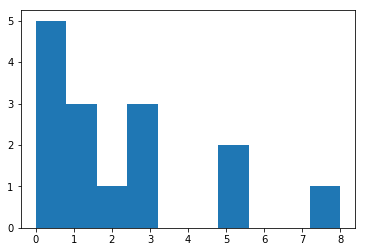

In [62]:
import matplotlib.pyplot as plt
G = nx.davis_southern_women_graph()
plt.figure(1)            #新建一个名叫 Figure1的画图窗口
plt.hist(nx.degree_histogram(G)) ##返回图中所有节点的度分布序列（从1至最大度的出现频次），绘制柱状图
#nx.draw(G, with_labels=True)
plt.show()

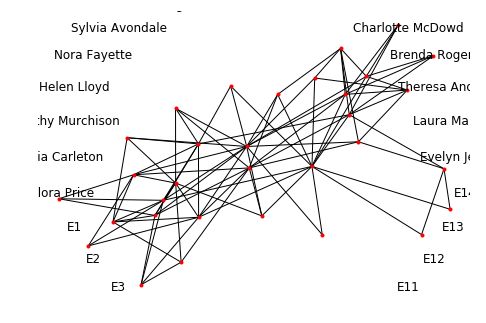

In [63]:
plt.figure(2)
pos = nx.shell_layout(G) #布局指定节点排列形式
nx.draw(G,node_size = 9)
nx.draw_networkx_labels(G,pos)
plt.show()

# circular_layout：节点在一个圆环上均匀分布
#- random_layout：节点随机分布
#- shell_layout：节点在同心圆上分布
#- spring_layout： 用Fruchterman-Reingold算法排列节点（这个算法我不了解，样子类似多中心放射状）
#- spectral_layout：根据图的拉普拉斯特征向量排列节

In [64]:
#补充jieba库   功能1：普通分词（三种分词模式）: 对某一篇文章进行关键字Map，我们选择普通分词，并自行过滤关键词，或添加自定义词库。
import jieba

seg_list = jieba.cut("我来到北京清华大学", cut_all=True)
print ("Full Mode:"+ "/ ".join(seg_list))              # 全模式,把句子中所有的可以成词的词语都扫描出来

seg_list = jieba.cut("我来到北京清华大学", cut_all=False)
print ("Default Mode:"+ "/ ".join(seg_list))          # 精确模式,将句子最精确地切开，适合文本分析.默认是精确模式

seg_list = jieba.cut_for_search("我来到北京清华大学") 
#搜索引擎模式,在精确模式的基础上，对长词再次切分，提高召回率，适合用于搜索引擎分词



#jieba.cut 以及 jieba.cut_for_search 返回的结构都是一个可迭代的 generator
#可以使用 for 循环来获得分词后得到的每一个词语(unicode),也可以用list(jieba.cut(…))转化为list
#for seg in seg_list :
#    print(seg)
print(list(seg_list))

#jieba.lcut 以及 jieba.lcut_for_search 直接返回 list
lcut = jieba.lcut('我来到北京清华大学')
lcut

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\nzn\AppData\Local\Temp\jieba.cache
Loading model cost 1.191 seconds.
Prefix dict has been built succesfully.


Full Mode:我/ 来到/ 北京/ 清华/ 清华大学/ 华大/ 大学
Default Mode:我/ 来到/ 北京/ 清华大学
['我', '来到', '北京', '清华', '华大', '大学', '清华大学']


['我', '来到', '北京', '清华大学']

In [65]:
#补充jieba库    功能2：自定义词典补充  知网、计算机研究所
import jieba                                 

jieba.load_userdict("006医学医药42w.txt") 
#加载自定义词典:jieba.load_userdict(file_name),file_name 为文件类对象或自定义词典的路径

#注意：file_name 若为路径或二进制方式打开的文件，则文件必须为 UTF-8 编码

In [66]:
#补充jieba库    功能3：提取关键词

儿童 1.0
小猪 0.7567069347700431
动画片 0.491402428732777
童话 0.4401499228668241
色彩 0.4266190547707598
爸爸 0.405535947092748
理念 0.38476870896173165
没有 0.35846443236522635
故事 0.3484833325454374
孩子 0.3348061155157781
设计 0.3167077759862768
创作 0.22228379174898227
模式 0.20845255138562657
动画 0.19987293747898927
有着 0.18885199459123703
成为 0.18101952376647207
元素 0.17549215585432154
注意力 0.17490537955212118
对比 0.17177228536166364
中国 0.16720936666284536
世界 0.16641467263244528
小说 0.15662295053035183
儿童画 0.1563662190667856
思考 0.1530082288165268
人物 0.15075101763677765
泥坑 0.14765162654941014
具有 0.14680721538351732
观众 0.1462995075679523
海盗 0.14298738207601652
突出 0.13989337173957817
画面 0.13789193080001552
爷爷 0.13579135613092594
城堡 0.13392862399588654
拯救 0.13355643243750429
幼儿 0.1330662778001309
怪物 0.12903238055389882
自行车 0.1264179660284921
可能 0.12615942365610447
小猫 0.1253358245519834
分析 0.12346461306060559
文本 0.12027957829588015
认知 0.11997050903524786
风格 0.11921614227169261
枪炮 0.11761776567600714
包裹 0.11726388821

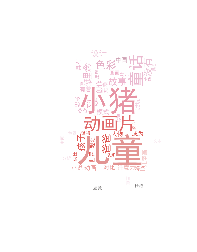

In [67]:
# -*- coding: UTF-8 -*-
# 1、基于TextRank：分析一批样本中用户的分类，用户的行为，用户的目的，
#我们可以选择TextRank抽取指定词性的关键字进行统计分析
import jieba.analyse

from PIL import Image,ImageSequence

import numpy as np

import matplotlib.pyplot as plt

from wordcloud import WordCloud,ImageColorGenerator

 

paper = ''

f = open('小猪佩奇.txt','r')
for i in f:
    paper +=f.read()

result = jieba.analyse.textrank(paper,topK=50,withWeight=True,allowPOS=('ns', 'n', 'vn', 'v')) 
# topK：返回多少个TextRank权重最大的关键词
# withWeight：是否一并返回关键词的权重值
# allowPOS 仅包括指定词性的词，默认值为空，即不筛选


keywords = {}

for i in result:

    keywords[i[0]]=i[1]
    print(i[0] + ' '+ str(i[1]))


image = Image.open('小猪佩奇.jpg') 

graph = np.array(image)#使用nump将图片转化为数组

wc = WordCloud(font_path='simhei.ttf',background_color='White',max_font_size=250,mask=graph) 
#font_path：设置字体，注意要设置成支持中文的字体
#background_color：设置生成的词云背景颜色
#max_font_size：设置词云容纳的词量
#mask：设置背景图片

wc.generate_from_frequencies(keywords)
#调用wordcloud中的generate_from_frequencies方法，根据分词的频率创建一个词云

image_color = ImageColorGenerator(graph)
#使用ImageColorGenerator方法，提取RGB图片的颜色并应用于词云

plt.imshow(wc)

plt.imshow(wc.recolor(color_func=image_color))

plt.axis('off')

plt.show()

wc.to_file('2.png')


In [68]:
# 2、基于TF-IDF关键字提取: 对采集的一批样本进行关键字分析，我们可以选择TF-IDF，对所有的关键字进行词频统计，并绘制出关键字云图。

jieba.analyse.set_stop_words('stop_words.txt')
jieba.analyse.set_idf_path(file_name) # file_name为自定义语料库的路径
jieba.analyse.extract_tags(sentence, topK=20, withWeight=False, allowPOS=())

NameError: name 'file_name' is not defined

In [69]:
#补充jieba库    功能4：词性标注
import jieba.posseg as pseg

words = pseg.cut("我爱北京天安门")

for word, flag in words:
    print('%s %s' % (word, flag))

我 r
爱 v
北京 ns
天安门 ns


In [70]:
import codecs #可解决爬虫或者其他方式得到一些数据写入文件时会有编码不统一的问题
stopwords = [line.strip() for line in codecs.open('stop_words.txt', 'r', 'utf-8').readlines()]  
#使用普通分词的时候，cut完与停用词逐一比较
stopwords

['\ufeff,',
 '?',
 '、',
 '。',
 '“',
 '”',
 '《',
 '》',
 '！',
 '，',
 '：',
 '；',
 '？',
 '人民',
 '末##末',
 '啊',
 '阿',
 '哎',
 '哎呀',
 '哎哟',
 '唉',
 '俺',
 '俺们',
 '按',
 '按照',
 '吧',
 '吧哒',
 '把',
 '罢了',
 '被',
 '本',
 '本着',
 '比',
 '比方',
 '比如',
 '鄙人',
 '彼',
 '彼此',
 '边',
 '别',
 '别的',
 '别说',
 '并',
 '并且',
 '不比',
 '不成',
 '不单',
 '不但',
 '不独',
 '不管',
 '不光',
 '不过',
 '不仅',
 '不拘',
 '不论',
 '不怕',
 '不然',
 '不如',
 '不特',
 '不惟',
 '不问',
 '不只',
 '朝',
 '朝着',
 '趁',
 '趁着',
 '乘',
 '冲',
 '除',
 '除此之外',
 '除非',
 '除了',
 '此',
 '此间',
 '此外',
 '从',
 '从而',
 '打',
 '待',
 '但',
 '但是',
 '当',
 '当着',
 '到',
 '得',
 '的',
 '的话',
 '等',
 '等等',
 '地',
 '第',
 '叮咚',
 '对',
 '对于',
 '多',
 '多少',
 '而',
 '而况',
 '而且',
 '而是',
 '而外',
 '而言',
 '而已',
 '尔后',
 '反过来',
 '反过来说',
 '反之',
 '非但',
 '非徒',
 '否则',
 '嘎',
 '嘎登',
 '该',
 '赶',
 '个',
 '各',
 '各个',
 '各位',
 '各种',
 '各自',
 '给',
 '根据',
 '跟',
 '故',
 '故此',
 '固然',
 '关于',
 '管',
 '归',
 '果然',
 '果真',
 '过',
 '哈',
 '哈哈',
 '呵',
 '和',
 '何',
 '何处',
 '何况',
 '何时',
 '嘿',
 '哼',
 '哼唷',
 '呼哧',
 '乎',
 '哗',
 '还是',
 '还有',
 '换句话说',
 '换言之',
 